# LIFE EXPECTANCY PROJECT FROM KAGGLE

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [85]:
df_original = pd.read_csv('Life Expectancy Data.csv')

In [86]:
df_original.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [87]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# Working on Missing Values

In [98]:
# missing data
total = df_original.isnull().sum().sort_values(ascending=False)
percent = (df_original.isnull().sum()/df_original.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Population,652,0.221920
Hepatitis B,553,0.188223
GDP,448,0.152485
Total expenditure,226,0.076923
Alcohol,194,0.066031
Income composition of resources,167,0.056841
Schooling,163,0.055480
thinness 5-9 years,34,0.011572
thinness 1-19 years,34,0.011572
BMI,34,0.011572


In [99]:
df_original.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [100]:
df_new = df_original.copy()

In [101]:
df_new.dropna(subset = ['Life expectancy '], inplace=True)

In [102]:
df_new['Life expectancy '].isnull().sum()

0

In [ ]:
df_new.dropna(subset = ['Life expectancy '], inplace=True)

#### South Sudan is missing a significant amount of data related to immunization factor, therefore all observations for this country will be removed from dataset.

In [115]:
#df_new[df_new['Country']== 'South Sudan'].isnull().sum()

In [111]:
df_new = df_new[df_new['Country'] != 'South Sudan']

In [163]:
#df_new[df_new['Country']=='Montenegro']

#### To delete rows that meet two conditions.

In [161]:
# To delete rows that meet two conditions.
# To get a list of indices for rows meeting certain conditions. 
# The resulting list is used in the drop method.
row_index_delete = []
for row in df_new.itertuples():
    #print(row[2])
    if (row[1] == 'Montenegro') & (row[2] <= 2005):
        print('hi')
        row_index_delete.append(row[0])
        #print(row_index_delete)

In [162]:
df_new.drop(row_index_delete, axis=0, inplace=True)

In [171]:
df_new.drop(df_new[df_new['Polio'].isnull()].index, axis=0, inplace=True)

In [180]:
#df_new.isnull().sum()

#### Dropping columns Population and GDP as its correlation with life expentacy is lower than 0.5. The missing values for those columns could have been pulled from the web.

In [201]:
df_new.drop(['GDP'], axis = 1, inplace = True)

In [302]:
df_new.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

#### Hepatitis nan replacement

In [220]:
# This works for those countries with some data in Hepatitis column
df_new['Hepatitis B'] = df_new['Hepatitis B'].fillna(df_new.groupby('Country')['Hepatitis B'].transform('mean'))

In [256]:
#df_new[df_new['Hepatitis B'].isnull()].groupby('Country').agg(Hepatitis = ('Hepatitis B', 'count')).reset_index()

In [257]:
# There were 8 countries with no info in Hepatitis column
df_new['Hepatitis B'] = df_new['Hepatitis B'].replace({np.nan : 0})

#### Alcohol

In [272]:
df_new.dropna(subset=['Alcohol', ' BMI ', 'Total expenditure'], inplace=True)

In [274]:
df_new.shape

(2676, 20)

#### Dropping 120 rows of missing Schooling data

In [300]:
df_new[df_new['Schooling'].isnull()].groupby('Country')[['Country','Schooling']].count()

,Country,Schooling
Country,,
Czechia,15,0
Côte d'Ivoire,15,0
Democratic Republic of the Congo,15,0
Republic of Korea,15,0
Republic of Moldova,15,0
United Kingdom of Great Britain and Northern Ireland,15,0
United Republic of Tanzania,15,0
United States of America,15,0


In [301]:
df_new.dropna(subset=['Schooling'], inplace=True)

### 1) Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy? 

(array([  1.,   3.,   6.,  44.,  56.,  78., 104., 125., 177., 100., 184.,
        221., 209., 371., 540., 279., 202., 160.,  38.,  30.]),
 array([36.3  , 38.935, 41.57 , 44.205, 46.84 , 49.475, 52.11 , 54.745,
        57.38 , 60.015, 62.65 , 65.285, 67.92 , 70.555, 73.19 , 75.825,
        78.46 , 81.095, 83.73 , 86.365, 89.   ]),
 <BarContainer object of 20 artists>)

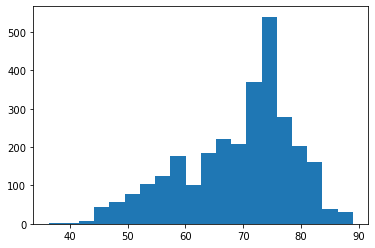

In [19]:
#Life Expectancy
plt.hist(df.iloc[:,3], bins = 20)
#plt.xticks(0,90])

<AxesSubplot:>

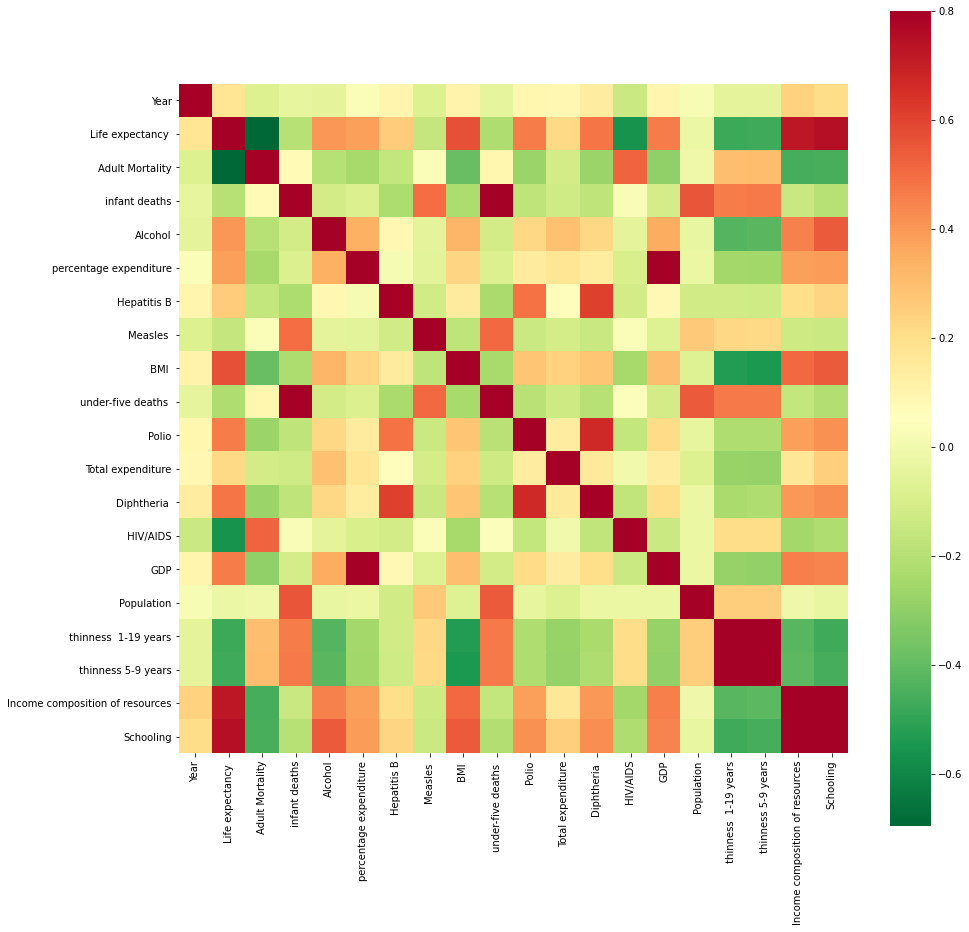

In [191]:
#correlation matrix
corrmat = df_original.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax=0.8, square=True,cmap="RdYlGn_r")

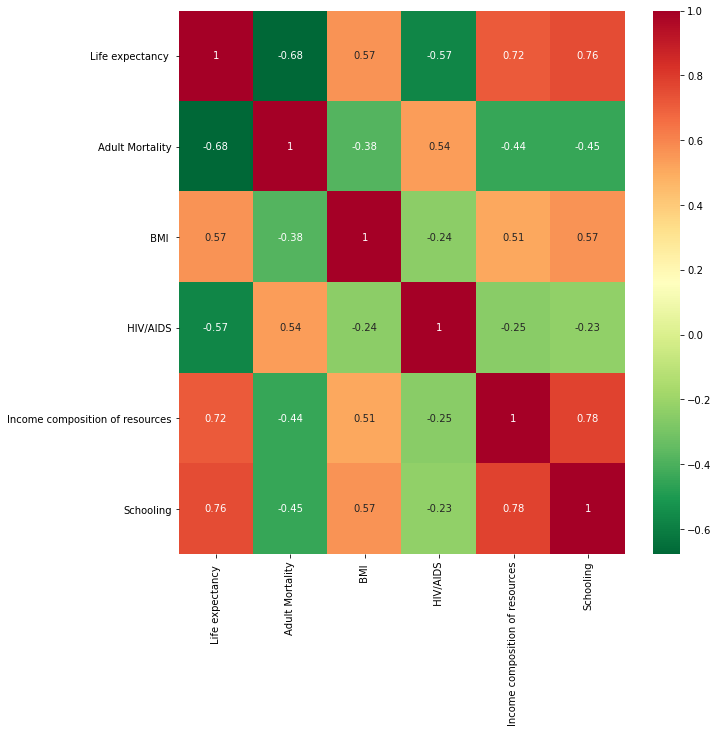

In [303]:
# most correlated features with life expectancy
corrmat = df_new.corr()
top_corr_features = corrmat.index[abs(corrmat["Life expectancy "])>0.4]
plt.figure(figsize=(10,10))
g = sns.heatmap(df_new[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

Text(0, 0.5, 'Life expectancy ')

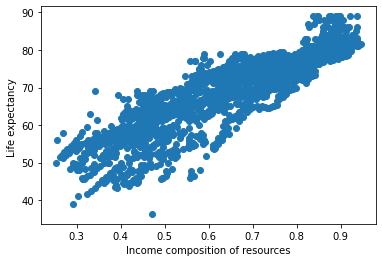

In [318]:
plt.scatter(df_new['Income composition of resources'], df_new['Life expectancy '])
plt.xlabel('Income composition of resources')
plt.ylabel('Life expectancy ')

#### Removing outliers for Income Composition of Resources equal to zero 

In [316]:
Income_outliers_indeces = df_new[df_new['Income composition of resources'] == 0].index

In [317]:
df_new.drop(Income_outliers_indeces, axis=0, inplace=True)

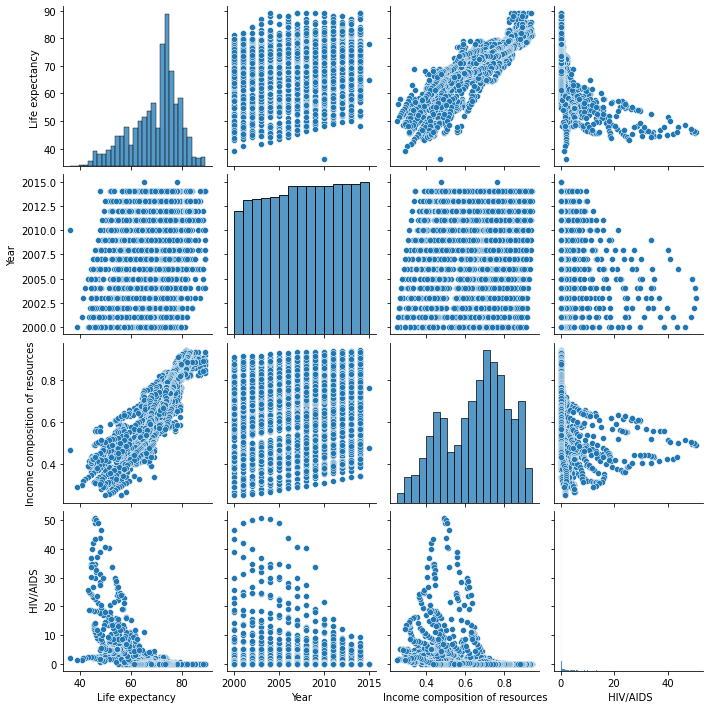

In [326]:
sns.pairplot(df_new[['Life expectancy ','Year','Income composition of resources',' HIV/AIDS']])
plt.show()

#### Life Expectancy per year

In [323]:
df_new.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

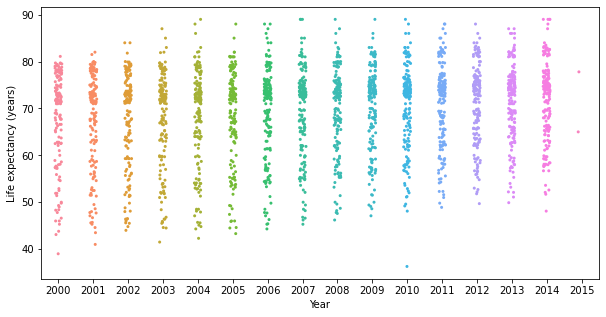

In [339]:
f, ax = plt.subplots(figsize=(10, 5))

sns.stripplot(x='Year',y ='Life expectancy ',data = df_new, size =3, jitter = True)
plt.ylabel('Life expectancy (years)')
plt.show()

#### Life expenctacy by Country

In [358]:
df_2014 = df_new[df_new['Year']==2014].sort_values(by='Life expectancy ')
df_2013 = df_new[df_new['Year']==2013].sort_values(by='Life expectancy ')


In [359]:
df_2014_filter = df_2014[df_2014['Life expectancy ']>65]
df_2013_filter = df_2013[df_2013['Life expectancy ']>65]

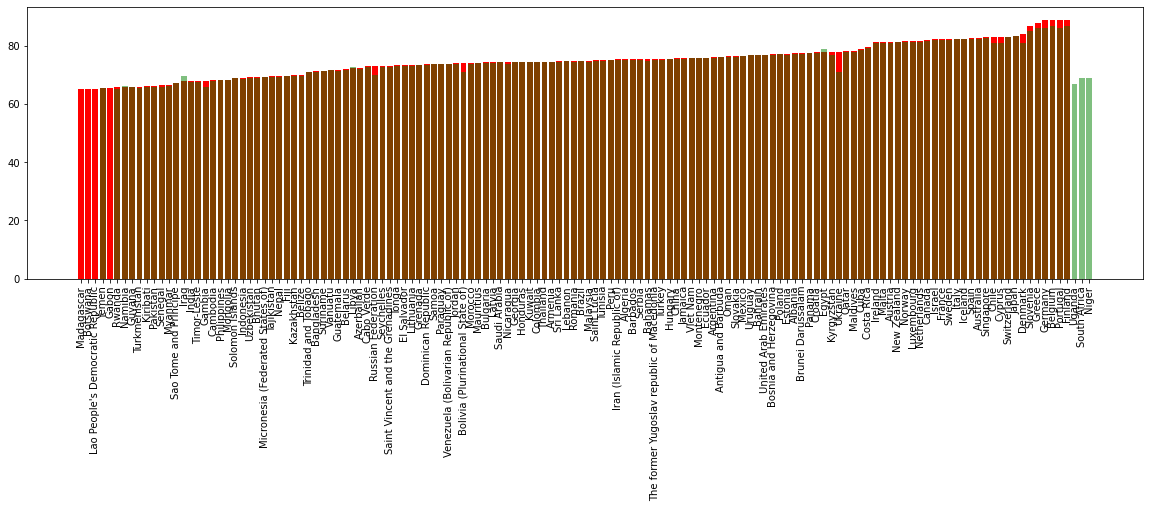

In [365]:
plt.subplots(figsize=(20, 5))

plt.bar(df_2014_filter['Country'], df_2014_filter['Life expectancy '], color = 'red')
plt.bar(df_2013_filter['Country'], df_2013_filter['Life expectancy '], color = 'green', alpha = 0.5)

plt.xticks(rotation=90)

plt.show()

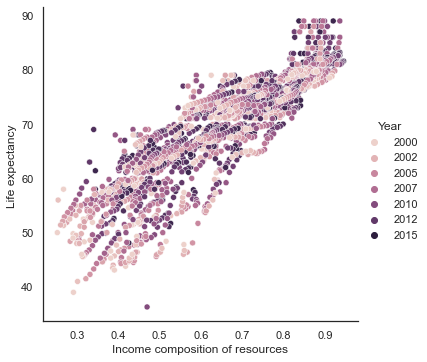

In [413]:
#sns.set_style("white")

sns.relplot(x='Income composition of resources', y='Life expectancy ', data=df_new, kind='scatter', hue='Year')
#sns.set_theme()

#plt.legend(loc='upper left')
plt.show()

### 3) How does Infant and Adult mortality rates affect life expectancy?

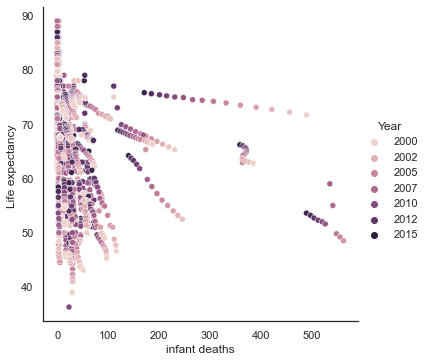

In [415]:
sns.set_style("white")

# without including values of infant death from India (Outliers)
sns.relplot(x='infant deaths', y='Life expectancy ', data=df_new[df_new['infant deaths']<750], kind='scatter',hue='Year')
#sns.set_theme()

#plt.legend(df_new[df_new['infant deaths']<750]['Year'], loc='upper left')
plt.show()

In [404]:
infant_effect = df_new[df_new['infant deaths']<750].groupby('Year')[['infant deaths','Life expectancy ']].mean().reset_index()

In [405]:
infant_effect

,Year,infant deaths,Life expectancy
0,2000,24.517986,67.631655
1,2001,24.085526,67.692763
2,2002,23.150327,67.837908
3,2003,22.409091,67.951299
4,2004,25.141935,68.092258
5,2005,24.031847,68.620382
6,2006,22.341317,69.031138
7,2007,21.658683,69.394012
8,2008,21.131737,69.743114
9,2009,20.473054,70.262874


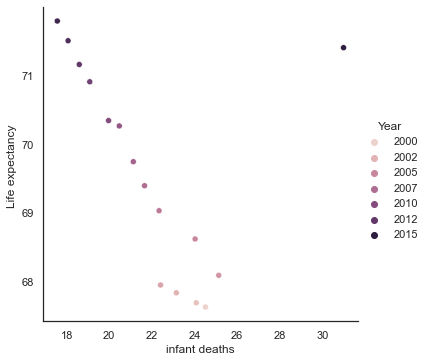

In [419]:
sns.relplot(x='infant deaths', y='Life expectancy ', data=infant_effect, hue='Year')
#plt.legend(infant_effect.index)
plt.show()

# Model Preparation

In [525]:
# Importing modules

# Importing metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import plot_confusion_matrix
#from sklearn.metrics import classification_report
#from sklearn.linear_model import LogisticRegression

In [420]:
# The dataset is simplified by only including those variables with correlation higher than abs(0.5) as indicated in the heatmap above.

In [506]:
df_model = df_new[top_corr_features].reset_index().drop('index',axis=1)

In [508]:
df_model.head()

,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Income composition of resources,Schooling
0,65.0,263.0,19.1,0.1,0.479,10.1
1,59.9,271.0,18.6,0.1,0.476,10.0
2,59.9,268.0,18.1,0.1,0.470,9.9
3,59.5,272.0,17.6,0.1,0.463,9.8
4,59.2,275.0,17.2,0.1,0.454,9.5


In [509]:
data_X = df_model.drop('Life expectancy ', axis=1)
data_y = df_model['Life expectancy ']

In [511]:
data_X.head(2)

,Adult Mortality,BMI,HIV/AIDS,Income composition of resources,Schooling
0,263.0,19.1,0.1,0.479,10.1
1,271.0,18.6,0.1,0.476,10.0


In [512]:
#SCALING data_X using MinMaxScaler
#Scaling only columns that have values > 1. That would exclude only the "Income Composition of Resources".

to_scale = ['Adult Mortality', ' BMI ', ' HIV/AIDS', 'Schooling']

mms = MinMaxScaler()
scaled = mms.fit_transform(data_X[to_scale])
scaled = pd.DataFrame(scaled,columns=to_scale)
for col in scaled:
    data_X[col] = scaled[col]

In [518]:
# Scaled data X
data_X.head(2)

,Adult Mortality,BMI,HIV/AIDS,Income composition of resources,Schooling
0,0.362881,0.237845,0.0,0.479,0.407821
1,0.373961,0.231275,0.0,0.476,0.402235


In [519]:
#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, shuffle=True, train_size=0.8, random_state = 42)

In [520]:
rgr = RandomForestRegressor()

param_grid = { 
    #'n_estimators': [500],
    #'max_features': ['auto', 'sqrt', 'log2'],
    #'max_depth' : [7]
    #'criterion' :['gini', 'entropy']
}

rfr_grid = GridSearchCV(estimator = rgr, param_grid= param_grid, cv = 5, verbose = 1, n_jobs = -1)
rfr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.4s remaining:    9.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.5s finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1, param_grid={},
             verbose=1)

In [521]:
model_rfr = rfr_grid.best_estimator_  # Sklearn automatically retrains the model on the whole 
                                      # training set following cross-validation using the best hyperparameters
#pred_prob1 = model_rfc.predict_proba(X_test)
#rfc_grid.best_params_

In [523]:
y_pred = model_rfr.predict(X_test)

In [530]:
# Model Performance
r2_test = r2_score(y_test, y_pred)
print('R^2 using test data: %.3f' %r2_test)

R^2 using test data: 0.960


## Scaling using train set first and applying the scaler on the test set afterwards 

In [557]:
data_X1 = df_model.drop('Life expectancy ', axis=1)
data_y1 = df_model['Life expectancy ']

In [558]:
#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(data_X1, data_y1, shuffle=True, train_size=0.8, random_state = 42)

In [566]:
X_train = X_train.reset_index().drop('index',axis=1)
y_train = y_train.reset_index().drop('index',axis=1)

X_test = X_test.reset_index().drop('index',axis=1)
y_test = y_test.reset_index().drop('index',axis=1)

In [567]:
#SCALING data_X using MinMaxScaler
#Scaling only columns that have values > 1. That would exclude only the "Income Composition of Resources".

to_scale = ['Adult Mortality', ' BMI ', ' HIV/AIDS', 'Schooling']

mms = MinMaxScaler()
mms.fit(X_train[to_scale])
X_train_some = mms.transform(X_train[to_scale])
X_test_some = mms.transform(X_test[to_scale])

X_train_scaled = pd.DataFrame(X_train_some,columns=to_scale)
X_test_scaled = pd.DataFrame(X_test_some,columns=to_scale)

for col in X_train_scaled:
    X_train[col] = X_train_scaled[col]
    X_test[col] = X_test_scaled[col]

In [571]:
rgr = RandomForestRegressor()

param_grid = { 
    #'n_estimators': [500],
    #'max_features': ['auto', 'sqrt', 'log2'],
    #'max_depth' : [7]
    #'criterion' :['gini', 'entropy']
}

rfr_grid = GridSearchCV(estimator = rgr, param_grid= param_grid, cv = 5, verbose = 1, n_jobs = -1)
rfr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.1s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.2s finished
C:\Users\Luis Patruyo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1, param_grid={},
             verbose=1)

In [572]:
model_rfr = rfr_grid.best_estimator_  # Sklearn automatically retrains the model on the whole 
                                      # training set following cross-validation using the best hyperparameters
#pred_prob1 = model_rfc.predict_proba(X_test)
#rfc_grid.best_params_

In [573]:
y_pred = model_rfr.predict(X_test)

In [574]:
# Model Performance
r2_test = r2_score(y_test, y_pred)
print('R^2 using test data: %.3f' %r2_test)

R^2 using test data: 0.961
